Importing Required packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Fetching the data into dataframe from the given csv file.

In [65]:
df=pd.read_csv('monet.csv')
df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


Exploratory Data Analysis of a given dataset

Finding the count of Null values in all fields 

In [66]:
df.isnull().sum()



PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

As there are no Null values in the dataset, there is no necessity of imputing values.

Descriptive Statistics of Dataset

In [67]:
df.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


Plotting histograms of each field to know it's distribution

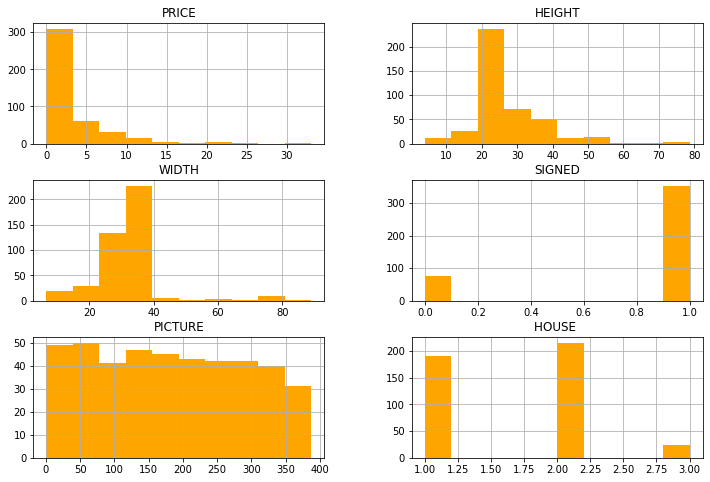

In [69]:
fields_distribution=df.hist(figsize=(12,8),color='Orange')

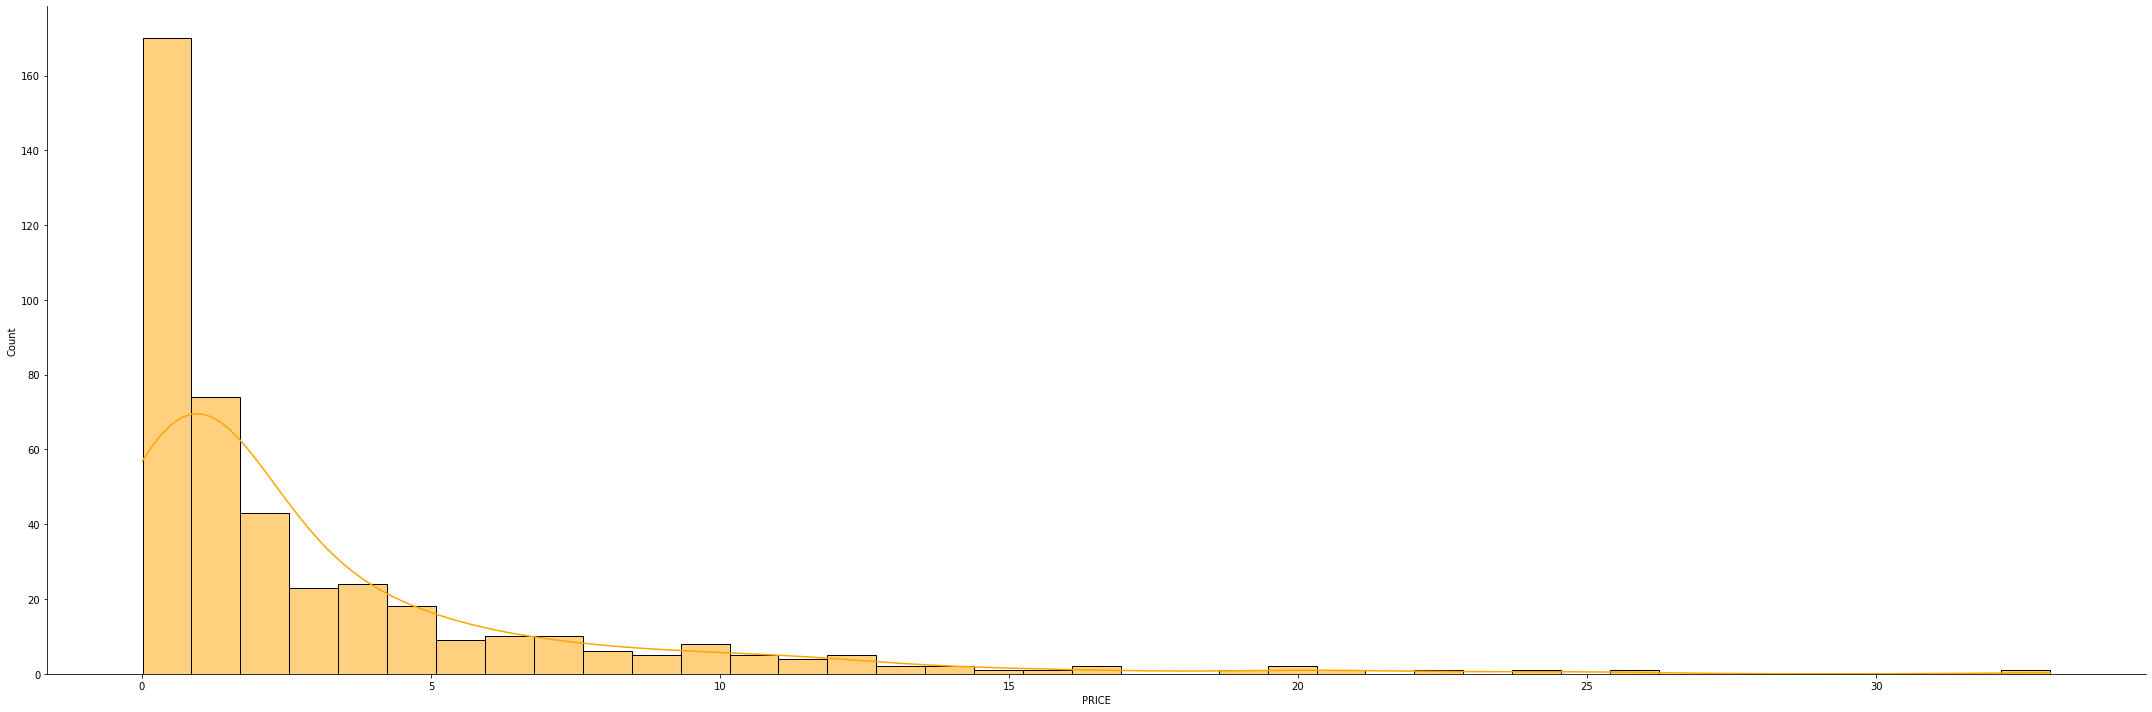

In [70]:

sns.displot(data=df['PRICE'],kde=True,height=10,aspect=3,color='Orange')

By looking into the distribution of dependent Variable Price, we can conclude that the most of the curve falls in between 15 bins and rest of them are considered as outliers.

Creation of New Field **Size** for modeling




In [71]:
df['Size']=df['WIDTH']*df['HEIGHT']
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,Size
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


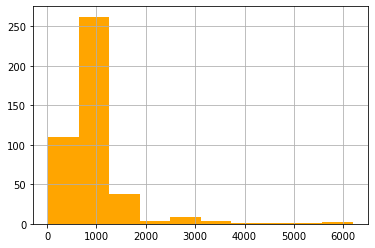

In [72]:
#Size field distribution
size_distribution=df['Size'].hist(color='Orange')
plt.show()

**Selection of Independent Variables for Modeling:**

We will plot the correlation graph to findout the correlation score between each independent variable to the dependent variable (**Price**)

In [73]:
#Correlation Scores
monet_correlationscore=df.corr()
monet_correlationscore

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,Size
PRICE,1.000000,0.314581,0.346881,0.136362,0.106078,-0.039878,0.347227
HEIGHT,0.314581,1.000000,0.503280,-0.145835,0.041556,-0.095278,0.810881
WIDTH,0.346881,0.503280,1.000000,-0.109218,0.046845,-0.169441,0.853942
SIGNED,0.136362,-0.145835,-0.109218,1.000000,0.009664,-0.132464,-0.198969
PICTURE,0.106078,0.041556,0.046845,0.009664,1.000000,-0.008359,0.090118
HOUSE,-0.039878,-0.095278,-0.169441,-0.132464,-0.008359,1.000000,-0.124385
Size,0.347227,0.810881,0.853942,-0.198969,0.090118,-0.124385,1.000000


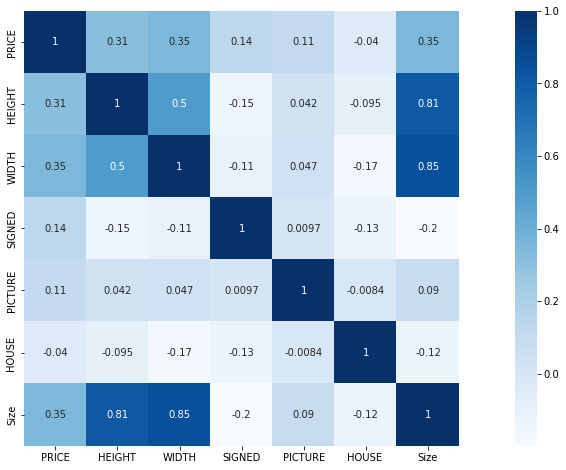

In [74]:
#Correlation Heat Map
plt.subplots(figsize=(20,8))
sns.heatmap(monet_correlationscore,annot=True,square=True,cmap='Blues')

From the above correlation heat map, it is evident that Width and Size has same correlation score to the dependent variable Price. 

This score can be calculated between -1 to 1, which says value nearer to one is highly correlated whereas value nearer to -1 is Negatively correleated or least correlated and the value nearer to 0 is said to be Neutral.

From this, we will consider **Size** and **Width** as Independent Variables in Modeling

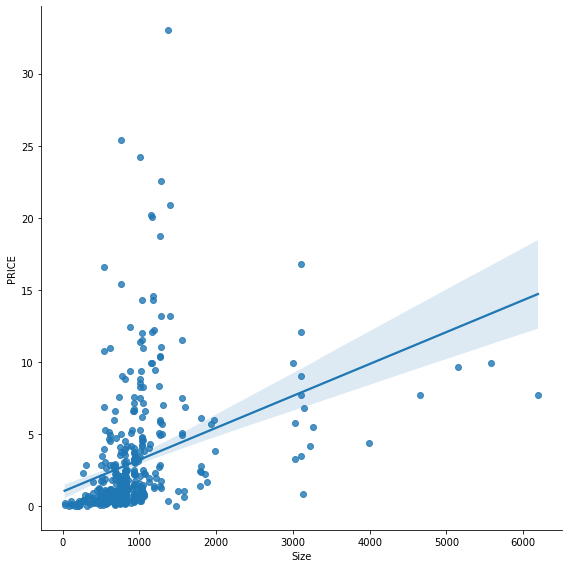

In [75]:
#Plot between Size and Price
sns.lmplot(x= 'Size', y = 'PRICE', data = df,ci=90,height=8)

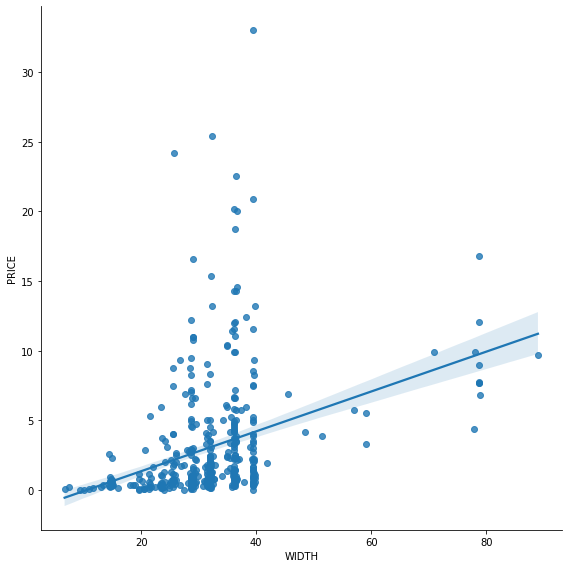

In [76]:
# Plot between WIDTH and PRICE
sns.lmplot(x= 'WIDTH', y = 'PRICE', data = df,ci=90,height=8)

From the above graphs, it is clear that as the Size, width increases, price of the painting increases.

**Linear Regression Model**

X: variables known as independent variables, predictors, features

Y: variables known as dependent or target variable

Y=mX+C is the equation used to calculate the Y (dependent Variable) value.
m is the slope
C is Y-intercept
X is an Independent Variable.

**Model 1**

**Univariate Linear Regression Model**

Univariate Linear Regression or Simple Linear Regression models get only one input variable as its single predictor. 

Predictor/Indepedent variable (X): SIZE

Dependent variable (Y): PRICE

Using Scipy package, we are splitting the given dataset into 80% as training dataset and 20% as testing dataset.

In [104]:
# Split dataset for training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Size']], df['PRICE'], train_size = 0.8,random_state=10)

print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (344, 1) (344,)
Shapes of X_test, y_test:  (86, 1) (86,)


In [105]:
# Building a Linear Regression model
from sklearn.linear_model import LinearRegression
regression_model  = LinearRegression()

# Fit the model into the training data
regression_model .fit (X_train, y_train)

LinearRegression()

In [106]:
# Apply the model to predict y in the test set
y_test_pred = regression_model.predict (X_test) 

# Apply the model to predict y in the train set
y_train_pred = regression_model.predict(X_train)

In [107]:
# Print coefficient and intercept of the model
print ('Intercept of the model : ', regression_model.intercept_)
print ('Coefficient of the model : ', regression_model.coef_)

Intercept of the model :  1.295945346533
Coefficient of the model :  [0.00200792]


Model Evaluation

To evaluate the performance of Linear Regression model, we could use Mean Squared Error (MSE), Root Mean Square error and Mean Absolute Error as Cost Functions. This Error explains the difference value between obtained and actual values.



In [108]:
# Evaluate the model performance in the training set
from sklearn.metrics import mean_squared_error, mean_absolute_error


result_dict_test={}

mse = mean_squared_error(y_train, y_train_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train, y_train_pred)

# Evaluate the model performance in the testing set
mse = mean_squared_error (y_test, y_test_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_test_pred)

result_dict_test['test_mse']=mse
result_dict_test['test_rmse']=rmse
result_dict_test['test_mae']=mae

print(' ')
print('MeanSquaredError obtained in the testing set:',mse)
print(' ')
print('RootMeanSquaredError obtained in the testing set:',rmse)
print(' ')
print('MeanAbsoluteError obtained in the testing set:',mae)

 
MeanSquaredError obtained in the testing set: 9.45784432335526
 
RootMeanSquaredError obtained in the testing set: 3.0753608444140763
 
MeanAbsoluteError obtained in the testing set: 2.1674194089828136


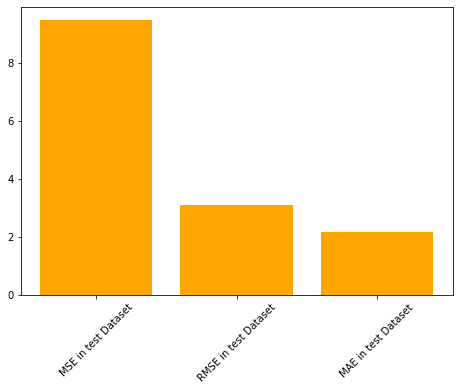

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Datasets = ['MSE in test Dataset', 'RMSE in test Dataset','MAE in test Dataset']
Obtained_Values = list(result_dict_test.values())
ax.bar(Datasets, Obtained_Values,color='Orange')
plt.xticks(rotation=45)
plt.show()

From the above obtained values, it is evident that MSE value is High. In order to be the model efficient, we need to fine tune the model by applying logarthimic method. From the distribution graphs above, we can see that the dependent variable Price is rightly skewed. To transform it to Normal distribution, we will apply logarthimic function.

Text(0.5, 1.0, 'Original values distribution')

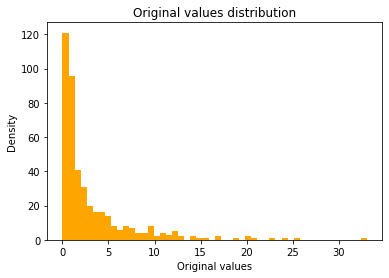

In [83]:
# Plot the original and transformed dependent variable

# original dependent variable
y = df['PRICE'] 

# apply logarithmic function to transform the dependent variable 
y_trans = np.log(y.values.reshape(-1,1))      

# Plot the original dependent variable
plt.hist(y, bins=50,color='Orange')
plt.ylabel('Density')
plt.xlabel('Original values')
plt.title('Original values distribution')


Text(0.5, 1.0, ' Log Transformed distribution')

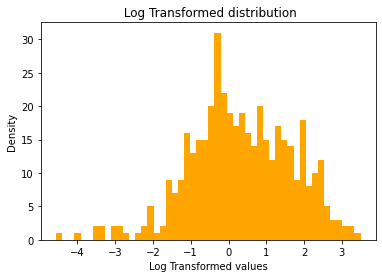

In [84]:

# Plot the transformed dependent variable
plt.hist(y_trans, bins=50,color='Orange')
plt.ylabel('Density')
plt.xlabel('Log Transformed values')
plt.title(' Log Transformed distribution')

Similarly, we can try transforming the SIZE independent variable since previously it showed to be positive skewed.

Text(0.5, 1.0, 'Original Size distribution')

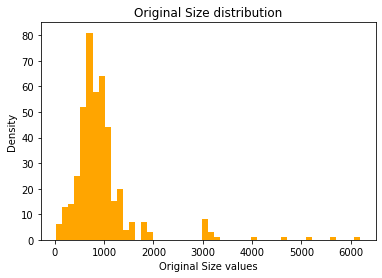

In [85]:
# Plot the original and transformed dependent variable

# original independent variable
x = df['Size']

# apply logarithmic function to transform the independent variable 
x_trans = np.log(x.values.reshape(-1,1))      


# Plot the original dependent variable
plt.hist(x, bins=50,color='Orange')
plt.ylabel('Density')
plt.xlabel('Original Size values')
plt.title('Original Size distribution')


Text(0.5, 1.0, 'Log Transformed Size distribution')

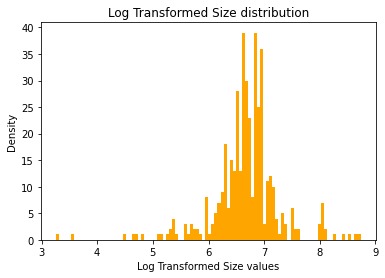

In [86]:

# Plot the transformed dependent variable
plt.hist(x_trans, bins=100,color='Orange')
plt.ylabel('Density')
plt.xlabel('Log Transformed Size values')
plt.title('Log Transformed Size distribution')

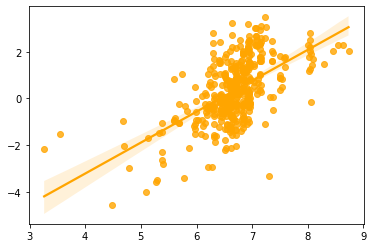

In [87]:
# Plot a scatter plot of the transformed SIZE and the transformed PRICE
sns.regplot(x=x_trans, y=y_trans,color='Orange')

**Model 2**
This model is the finetuned by transforming independent and dependent variables of previous model. 

X : log(Size)

Y: log(Price) 

In [103]:
from sklearn.compose import TransformedTargetRegressor

# Split data for training (80%) and testing (20%)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(x_trans, y_trans, train_size = 0.8,random_state=10)
print ('Shape of X_train and y_train: ', X_train.shape, y_train.shape)

print ('Shape of X_test and y_test: ', X_test.shape, y_test.shape)
print(' ')

# Building a Linear Regression model
from sklearn.linear_model import LinearRegression
regression_model_trans = LinearRegression()

# Fit the model into the training data
regression_model_trans.fit (X_train_trans, y_train_trans)

# Apply the model to predict y in the test set
y_test_trans_pred = regression_model_trans.predict (X_test_trans) 

# Apply the model to predict y in the train set
y_train_trans_pred = regression_model_trans.predict(X_train_trans)

# Evaluate the model performance in the testing set
mae_test=mean_absolute_error(y_test_trans, y_test_trans_pred)
mse_test = mean_squared_error (y_test_trans, y_test_trans_pred)
rmse_test=np.sqrt(mse_test)

print('Mean Absolute Error in the testing set for Model-2:', mae_test)
print(' ')
print('Mean Square Error in the testing set for Model-2:',mse_test)
print(' ')
print('Root Mean Square Error in the testing set for Model-2:',rmse_test)


Shape of X_train and y_train:  (344, 5) (344, 1)
Shape of X_test and y_test:  (86, 5) (86, 1)
 
Mean Absolute Error in the testing set for Model-2: 0.7968179727709628
 
Mean Square Error in the testing set for Model-2: 1.1216876187226534
 
Root Mean Square Error in the testing set for Model-2: 1.0590975492005699


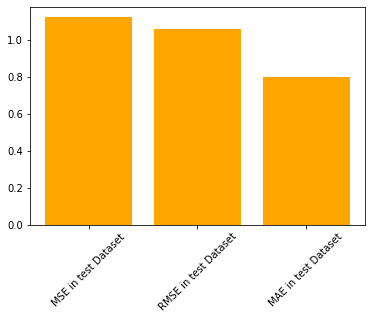

In [89]:
#plotting the obtained values into bar graph
result_dict_test={}
result_dict_test['test_mse']=mse_test
result_dict_test['test_rmse']=rmse_test
result_dict_test['test_mae']=mae_test
fig = plt.figure()
Datasets = ['MSE in test Dataset', 'RMSE in test Dataset','MAE in test Dataset']
Obtained_Values = list(result_dict_test.values())
plt.bar(Datasets,Obtained_Values,color='Orange')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Print intercept and coefficient of the model
print ('Intercept of the model 2: ', regression_model_trans.intercept_)
print('Coefficient of the model 2: ', regression_model_trans.coef_)

Intercept of the model 2:  [-8.79777232]
Coefficient of the model 2:  [[1.36801664]]


Conclusion: Based on MSE of the above simple Linear Regression models, we found that the model 2, which has the transformed Size and the transformed PRICE as independent and dependent variables, achieved the better performance. 

**Model 3:**
**Multivariate Linear Regression Model:**

In this model, more than one independent variable is considered for modeling. In this dataset, the variables which are likely predictors are the SIZE, the HOUSE, and the SIGNED. Since PICTURE contains unique values those variables will not be considered in this model. As size is the values of product of Height and Weights, we are not considering those variables again in this modeling.

The SIGNED and HOUSE variables contain discrete values:

In [91]:
print('Signed')
df['SIGNED'].value_counts()


Signed


1    353
0     77
Name: SIGNED, dtype: int64

In [92]:

print('House')
df['HOUSE '].value_counts()

House


2    215
1    191
3     24
Name: HOUSE , dtype: int64

SIGNED is a binary variable, but the HOUSE variable has three classes (1,2,3). We still can use discrete variables for Linear Regression, but these fields should be dummy coded before inputing into the Linear Regression model.

In [93]:
# Create dummy columns of the HOUSE variable
dummy_house_values = pd.get_dummies(df['HOUSE '], prefix='HOUSE')

# Join the dummy columns with the dataset
df=df.join(dummy_house_values)
display(df)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,Size,HOUSE_1,HOUSE_2,HOUSE_3
0,3.993780,21.3,25.6,1,1,1,545.28,1,0,0
1,8.800000,31.9,25.6,1,2,2,816.64,0,1,0
2,0.131694,6.9,15.9,0,3,3,109.71,0,0,1
3,2.037500,25.7,32.0,1,4,2,822.40,0,1,0
4,1.487500,25.7,32.0,1,4,2,822.40,0,1,0
...,...,...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64,1,0,0
426,9.352500,25.9,39.6,1,375,2,1025.64,0,1,0
427,8.252500,25.6,39.6,1,375,1,1013.76,1,0,0
428,3.410000,25.6,39.4,1,386,2,1008.64,0,1,0


Now, we will use Logarthmic method for Independent Variable 'Size'and Dependent Variable 'Price' for transormation of their values as these are rightly skewed.

In [94]:
# add the transformed SIZE variable into the dataset
df['SIZE_log']=x_trans

X = df[['SIZE_log', 'SIGNED', 'HOUSE_1', 'HOUSE_2', 'HOUSE_3']]
y = y_trans
print('X shape and y shape: ', X.shape, y.shape)

X shape and y shape:  (430, 5) (430, 1)


In [95]:
# Split data for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=10 )

print ('Shape of X_train and y_train: ', X_train.shape, y_train.shape)
print ('Shape of X_test and y_test: ', X_test.shape, y_test.shape)

Shape of X_train and y_train:  (344, 5) (344, 1)
Shape of X_test and y_test:  (86, 5) (86, 1)


In [96]:
# Build a multivariate LR model
mlr=LinearRegression()

# Fit the built model into training set
mlr.fit(X_train, y_train)

LinearRegression()

In [97]:
# Evaluate the model performance in the testing set
mae_test=mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error (y_test, y_test_pred)
rmse_test=np.sqrt(mse_test)

print('MeanAbsoluteError in the test set:',mae_test)
print(' ')
print('MeanSquaredError in the test set:',mse_test)
print(' ')
print('RootMeanSquaredError in the test set:',rmse_test)

MeanAbsoluteError in the test set: 2.745888214120187
 
MeanSquaredError in the test set: 8.683634871664427
 
RootMeanSquaredError in the test set: 2.9468007858802445


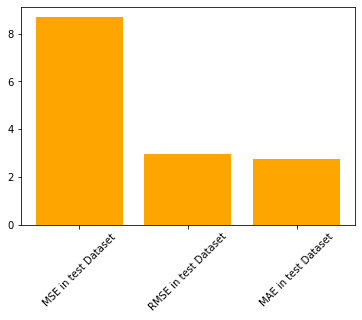

In [98]:
#plotting the obtained values into bar graph
result_dict_test={}
result_dict_test['test_mse']=mse_test
result_dict_test['test_rmse']=rmse_test
result_dict_test['test_mae']=mae_test
fig = plt.figure()
Datasets = ['MSE in test Dataset', 'RMSE in test Dataset','MAE in test Dataset']
Obtained_Values = list(result_dict_test.values())
plt.bar(Datasets,Obtained_Values,color='Orange')
plt.xticks(rotation=45)
plt.show()

The model achieved decent performance comparing to Model 2
 **(Log (Size) vs Log(Price)**).





In [99]:
# Print coefficients and intercepts of the model
print ('Intercept of the multivariate model: ', mlr.intercept_)
print('Coefficient of the multivariate model: ', mlr.coef_)

Intercept of the multivariate model:  [2.36426417e+14]
Coefficient of the multivariate model:  [[ 1.34132110e+00  1.77391269e+00 -2.36426417e+14 -2.36426417e+14
  -2.36426417e+14]]
